<a href="https://colab.research.google.com/github/ME-UoP-ME421/Rankine-LC/blob/Control-Systems/me421_group_lc_controlsystems_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions


* This is a group assignment. Complete the activities in groups that were assigned for ME421 for the vibrations lab.

* Make a copy of this and save it in your group github group repository.

* Do all your work, EXCLUSIVELY, in that saved notebook. Your github commits will serve as a refelection of your individual contributions. It will constitute 25% of your final grade for the lab.

* Complete all the first 3 tasks by 21/06/2023 and demonstrate the work in the class on 21/06/2023.

* Complete Tasks#1 and Task#2 by 5:00PM on 14/06/2023

* Complete Tasks#3 and the Task#4 by 5:00PM on 21/06/2023 and demonstrate the work in the class on 21/06/2023.

* Complete Task#5 by 5:00PM on 28/06/2023

#References

* https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb

* https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/MaithriPalaDHS_RigidBodyPIDControl_IITB_18_03_2023.pdf

#Task#1

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

Show that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

#Task#2

Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

\begin{align}
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}

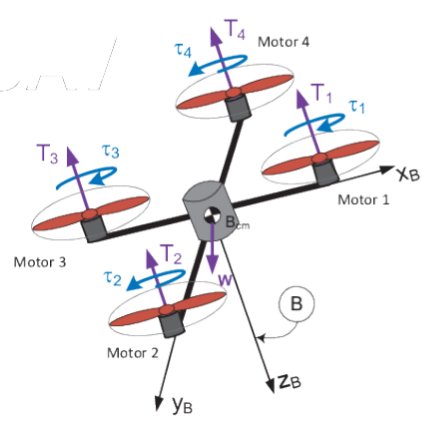

The τ applied to the drone with repect to the body frame by the 4 rotors is represented by the following matrix

\begin{align}
T^u = \begin{bmatrix}0 &l1cl & 0 & -l1cl\\ -l1cl &0&lc1 & 0\\-cd & cd & -cd & cd\end{bmatrix}\begin{bmatrix}\omega_1^2 \\ \omega_2^2 \\ \omega_3^3 \\ \omega_4^4 \end{bmatrix}
\end{align}

The force applied to the rotor by the thrust force on Z direction of the body fixed frame is given by

\begin{align}
f_u=c_1(\omega_1^2 + \omega_2^2+w_3^2+w_4^2)
\end{align}

Mutipling the above froce matrix by the directional matrix γ  its possible to have the force in the Z direction of the body fixed frame.
\begin{align}
γ=\begin{bmatrix}0\\ 0 \\ 1\end{bmatrix}
\end{align}

\begin{align}
F_u =f_u γ
\end{align}


In [1]:
def externalForceModel(qq,parameters,X):
  #Heavy Top Object
  M=parameters['M']; II=parameters['II']; g=parameters['g']; CM=parameters['CM'];
  R=X[0][0]; omega=X[1]; spi=R@ II@ R.T @ omega
  taue=(-M*g*qq.hatMatrix(R@CM) @ [0,0,1])-0*spi;
  fe=np.array([0,0.,-M*g]);

  return [taue,fe]

def actuator(qq,parameters, t, X, taue,fe):
  #tauu=np.array([0,0,0]);
  #fu=np.array([0,0,0]);
  R=X[0][0];
  l1=1
  cd=0.005
  cl=0.01
  w1=8
  w2=10
  w3=10
  w4=10
  ts=np.array([[0,l1*cl,0,-l1*cl],[-l1*cl,0,l1*cl,0],[-cd,cd,-cd,cd]])
  ip_omega=np.array([[w1*w1],[w2*w2],[w3*w3],[w4*w4]])
  Tauu=ts@ip_omega
  tauu1=(R@Tauu)

  Fu_1=cl*(w1*w1+w2*w2+w3*w3+w4*w4)
  gamma=np.array([[0],[0],[1]])
  Fu=Fu_1*gamma
  fu1 =(R@Fu)
  fu=np.array([fu1[0][0],fu1[1][0],fu1[2][0]])
  tauu=np.array([tauu1[0][0],tauu1[1][0],tauu1[2][0]])

  return [tauu,fu]


#Task#3

Deerive a PID controller for the attitude control of a quadrorotor and use simulations to demibstrate the very large region of stability of the controller

Here are few example our own implementations of this controller.

* https://youtu.be/6E9WDQNVSYA
* https://youtu.be/uUKxXImRMOA
* https://youtu.be/zq05N8m_9SA
* https://youtu.be/J5dThZGZN2g
* https://youtu.be/J5MMp6Be3tU
* https://youtu.be/6ZQgE1FI6Wc

#Task#4

Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing an inverted pendulum on a cart.

#Task#5

 Experimentally verify the stability properties of the controller derived in Task#5 using the experimental setup available in the applied mechanics lab.